In [94]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [95]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [96]:
dataset = load_boston()

In [97]:
x = dataset.data[:, 5:6] # Wenn ich nur Feature 6 haben will, dann 5:6 ---> Warum?
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [98]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.4584649934303068


### Non-linear Transformation:

$\vec{x} =\left(\!
    \begin{array}{c}
      x_1 \\
      x_2
    \end{array}
  \!\right) $ Wir haben Datenpunkte mit z.B. 2 Features.  
  
$\vec{z} = \phi(\vec{x})$   Wir wollen dann eine Transformation mit dem Grad=2 ausführen.  

$\vec{z} =\left(\!
    \begin{array}{c}
      z_1 \\
      \vdots \\
      z_9
    \end{array}
  \!\right) $ Daraus resultierenden dann (in dem Beispiel) 6 Features.  

In [99]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
pf = PolynomialFeatures(degree = degree)
pf.fit(x_train) # Hier wird nur auf den x-Daten gefittet
# In der Fit-Methode wird nur evaluiert auf welchee Koeffizienten wir die Features mappen wollen
# Die Features werden ist der Transform-Methode verändert
x_train_transformed = pf.transform(x_train)
x_test_transformed = pf.transform(x_test)


In [100]:
print(x_train.shape, x_train_transformed.shape)
print(x_test.shape, x_test_transformed.shape)
# Die Anzahl der Samples hat sich nicht verändert, die der Features hingegen schon
# Grundidee der PN-Regression: 2-D-Feature-Raum transformieren in einen höher-dimensionalen Raum (hier 2-D --> 6-D). 
# Im 6-D-Raum wird dann wieder die lineare Regression wieder angewendet

(354, 1) (354, 3)
(152, 1) (152, 3)


In [101]:
# Hier kann man sehen, wie aus 2-D 6-D wird
print(f"Old number of features: {pf.n_input_features_}")
print(f"New number of feautres: {pf.n_output_features_}")
print("Old Feature Names: ['x0', 'x1']")
print(f"New Feature Names: {pf.get_feature_names()}")

Old number of features: 1
New number of feautres: 3
Old Feature Names: ['x0', 'x1']
New Feature Names: ['1', 'x0', 'x0^2']


#### Polynomial Regression:

$\vec{y} = \mathbf{Z}\vec{\beta} + \vec{\epsilon}$  
$\mathbf{Z}$ ist hier dann der Datensatz nach der Transformation.

In [102]:
poly_regr = LinearRegression()
poly_regr.fit(x_train_transformed, y_train)
# Die y-Daten dürgen nicht verändert werden. Damit würde man die Problemstellung invalide machen!
# Es geht nur darum die x-Daten in einen anderen Feature-Raum zu heben
r2_score = poly_regr.score(x_test_transformed, y_test)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-Score: {r2_score}")

Coef: [9.1181022]
Intercept: -34.662307438406785
R2-Score: 0.5685094410898874


#### Visualization

In [103]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

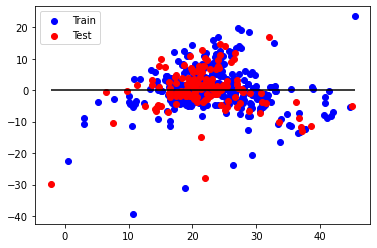

In [104]:
plot_residuals(regr, x_train, y_train, x_test, y_test)

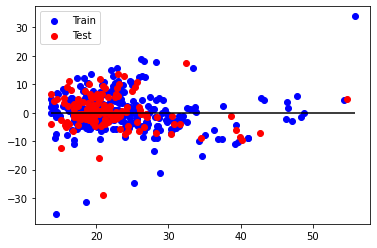

In [105]:
plot_residuals(poly_regr, x_train_transformed, y_train, x_test_transformed, y_test)